Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch [1/3000], Train Accuracy: 0.6236, Valid Accuracy: 0.5866
Epoch [2/3000], Train Accuracy: 0.6236, Valid Accuracy: 0.5866
Epoch [3/3000], Train Accuracy: 0.6236, Valid Accuracy: 0.5866
Epoch [4/3000], Train Accuracy: 0.6236, Valid Accuracy: 0.5866
Epoch [5/3000], Train Accuracy: 0.6236, Valid Accuracy: 0.5866
Epoch [6/3000], Train Accuracy: 0.6236, Valid Accuracy: 0.5866
Epoch [7/3000], Train Accuracy: 0.6236, Valid Accuracy: 0.5866
Epoch [8/3000], Train Accuracy: 0.6236, Valid Accuracy: 0.5866


<ipython-input-74-d44efc08241b>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  total_data['Age'].fillna(total_data['Age'].median(), inplace=True)
<ipython-input-74-d44efc08241b>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

Epoch [9/3000], Train Accuracy: 0.6236, Valid Accuracy: 0.5866
Epoch [10/3000], Train Accuracy: 0.6236, Valid Accuracy: 0.5866
Epoch [11/3000], Train Accuracy: 0.6236, Valid Accuracy: 0.5866
Epoch [12/3000], Train Accuracy: 0.6236, Valid Accuracy: 0.5866
Epoch [13/3000], Train Accuracy: 0.6236, Valid Accuracy: 0.5866
Epoch [14/3000], Train Accuracy: 0.6236, Valid Accuracy: 0.5866
Epoch [15/3000], Train Accuracy: 0.6236, Valid Accuracy: 0.5866
Epoch [16/3000], Train Accuracy: 0.6236, Valid Accuracy: 0.5866
Epoch [17/3000], Train Accuracy: 0.6236, Valid Accuracy: 0.5866
Epoch [18/3000], Train Accuracy: 0.6236, Valid Accuracy: 0.5866
Epoch [19/3000], Train Accuracy: 0.6236, Valid Accuracy: 0.5866
Epoch [20/3000], Train Accuracy: 0.6236, Valid Accuracy: 0.5866
Epoch [21/3000], Train Accuracy: 0.6236, Valid Accuracy: 0.5866
Epoch [22/3000], Train Accuracy: 0.6236, Valid Accuracy: 0.5866
Epoch [23/3000], Train Accuracy: 0.6236, Valid Accuracy: 0.5866
Epoch [24/3000], Train Accuracy: 0.6236, 

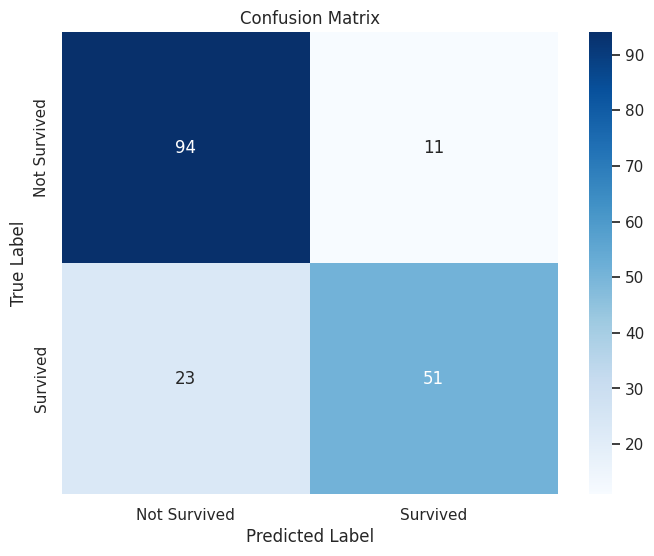

In [74]:
# 步驟 1: 掛載 Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 步驟 2: 引入必要的 Python 庫
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 設定 Seaborn 視覺化樣式
sns.set(style="whitegrid")

# 步驟 3: 載入訓練和測試數據
train_data = pd.read_csv('/content/drive/MyDrive/Titanic/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Titanic/test.csv')

# 資料合併
total_data = pd.concat([train_data, test_data], ignore_index=True)

# 填補缺失值
total_data['Age'].fillna(total_data['Age'].median(), inplace=True)
total_data['Embarked'].fillna('S', inplace=True)

# 轉換類別型變數
label_encoder = LabelEncoder()
total_data['Sex'] = label_encoder.fit_transform(total_data['Sex'])
total_data['Embarked'] = label_encoder.fit_transform(total_data['Embarked'])

# 定義特徵欄位
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']

# 準備訓練和測試數據
train_x = total_data[total_data['Survived'].notnull()][features].values
train_y = total_data[total_data['Survived'].notnull()]['Survived'].values
test_x = total_data[total_data['Survived'].isnull()][features].values

# 正規化
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

# 分割訓練集與驗證集
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

# 轉換成張量
train_x_tensor = torch.tensor(train_x, dtype=torch.float32)
train_y_tensor = torch.tensor(train_y, dtype=torch.float32)
valid_x_tensor = torch.tensor(valid_x, dtype=torch.float32)
valid_y_tensor = torch.tensor(valid_y, dtype=torch.float32)
test_x_tensor = torch.tensor(test_x, dtype=torch.float32)

# 建立 TensorDataset 並使用 DataLoader
train_dataset = TensorDataset(train_x_tensor, train_y_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)

# 定義改進的模型
class ImprovedModel(nn.Module):
    def __init__(self):
        super(ImprovedModel, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(train_x_tensor.shape[1], 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

# 初始化改進後的模型
model = ImprovedModel()

# 設定損失函數與優化器
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.00005)  # 調低學習率
epochs = 3000
best_acc = 0.0  # 儲存最佳驗證準確率

# 訓練模型
for epoch in range(epochs):
    model.train()  # 設定模型為訓練模式
    for i, (samples, labels) in enumerate(train_loader):
        # 前向傳播
        outputs = model(samples).squeeze()
        loss = criterion(outputs, labels)

        # 反向傳播與優化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # 驗證模型
    model.eval()  # 設定模型為評估模式
    with torch.no_grad():
        # 訓練集準確率
        train_pred = torch.sigmoid(model(train_x_tensor)).squeeze()
        train_pred = (train_pred > 0.5).float()
        train_acc = accuracy_score(train_y_tensor, train_pred)

        # 驗證集準確率
        valid_pred = torch.sigmoid(model(valid_x_tensor)).squeeze()
        valid_pred = (valid_pred > 0.5).float()
        valid_acc = accuracy_score(valid_y_tensor, valid_pred)

        print(f'Epoch [{epoch+1}/{epochs}], Train Accuracy: {train_acc:.4f}, Valid Accuracy: {valid_acc:.4f}')

        # 檢查是否符合條件並儲存最佳模型
        if valid_acc > best_acc and train_acc < 0.825 and abs(valid_acc - train_acc) < 0.01 and train_acc > 0.8 and valid_acc > 0.8:
            best_acc = valid_acc
            torch.save(model.state_dict(), 'best_improved_model.pth')
            print("最佳模型已更新並儲存。")

        # 顯示最終準確率
        if epoch == epochs - 1:  # 當訓練結束時
            print(f'最終 Train Accuracy: {train_acc:.4f}, 最終 Valid Accuracy: {valid_acc:.4f}')

# 驗證結果 - 混淆矩陣與分類報告
valid_pred = torch.sigmoid(model(valid_x_tensor)).squeeze()
valid_pred = (valid_pred > 0.5).float()
cm = confusion_matrix(valid_y_tensor, valid_pred)
report = classification_report(valid_y_tensor, valid_pred, target_names=['Not Survived', 'Survived'])

print("\n分類報告:\n", report)
print("混淆矩陣:\n", cm)

# 繪製混淆矩陣
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 測試模型
with torch.no_grad():
    test_pred = torch.sigmoid(model(test_x_tensor)).squeeze()
    test_pred = (test_pred > 0.5).int()


In [78]:
# 定義與訓練相同的模型結構
class ImprovedModel(nn.Module):
    def __init__(self):
        super(ImprovedModel, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(6, 64),  # 6 是特徵數量，根據訓練數據的特徵數量設置
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

# 初始化模型並加載最佳權重
best_model = ImprovedModel()
best_model.load_state_dict(torch.load("best_improved_model.pth"))
best_model.eval()  # 設定為評估模式

# 使用最佳模型進行預測並輸出為 CSV 文件
with torch.no_grad():
    # 對測試數據進行預測
    test_output = best_model(test_x_tensor)
    test_output = torch.sigmoid(test_output).squeeze()  # 將輸出轉換為 0 到 1 的概率
    test_pred = (test_output > 0.5).int()  # 概率 > 0.5 則為 1，否則為 0

    # 將預測結果轉為 DataFrame 格式
    submission = pd.DataFrame({
        'PassengerId': test_data['PassengerId'],  # 使用測試數據中的 PassengerId
        'Survived': test_pred.numpy()  # 將張量轉為 numpy 數組以便保存
    })

# 保存為 CSV 文件
submission.to_csv('IT_submission.csv', index=False)
print("結果已保存為 IT_submission.csv，可上傳至 Kaggle。")

# 將生成的 CSV 文件保存到 Google Drive
from google.colab import drive
drive.mount('/content/drive')
!cp IT_submission.csv /content/drive/MyDrive/
print("IT_submission.csv 已成功保存到 Google Drive 的 MyDrive 文件夾中。")


<ipython-input-78-81dfa9a5e38c>:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load("best_improved_model.pth"))


結果已保存為 IT_submission.csv，可上傳至 Kaggle。
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
IT_submission.csv 已成功保存到 Google Drive 的 MyDrive 文件夾中。
